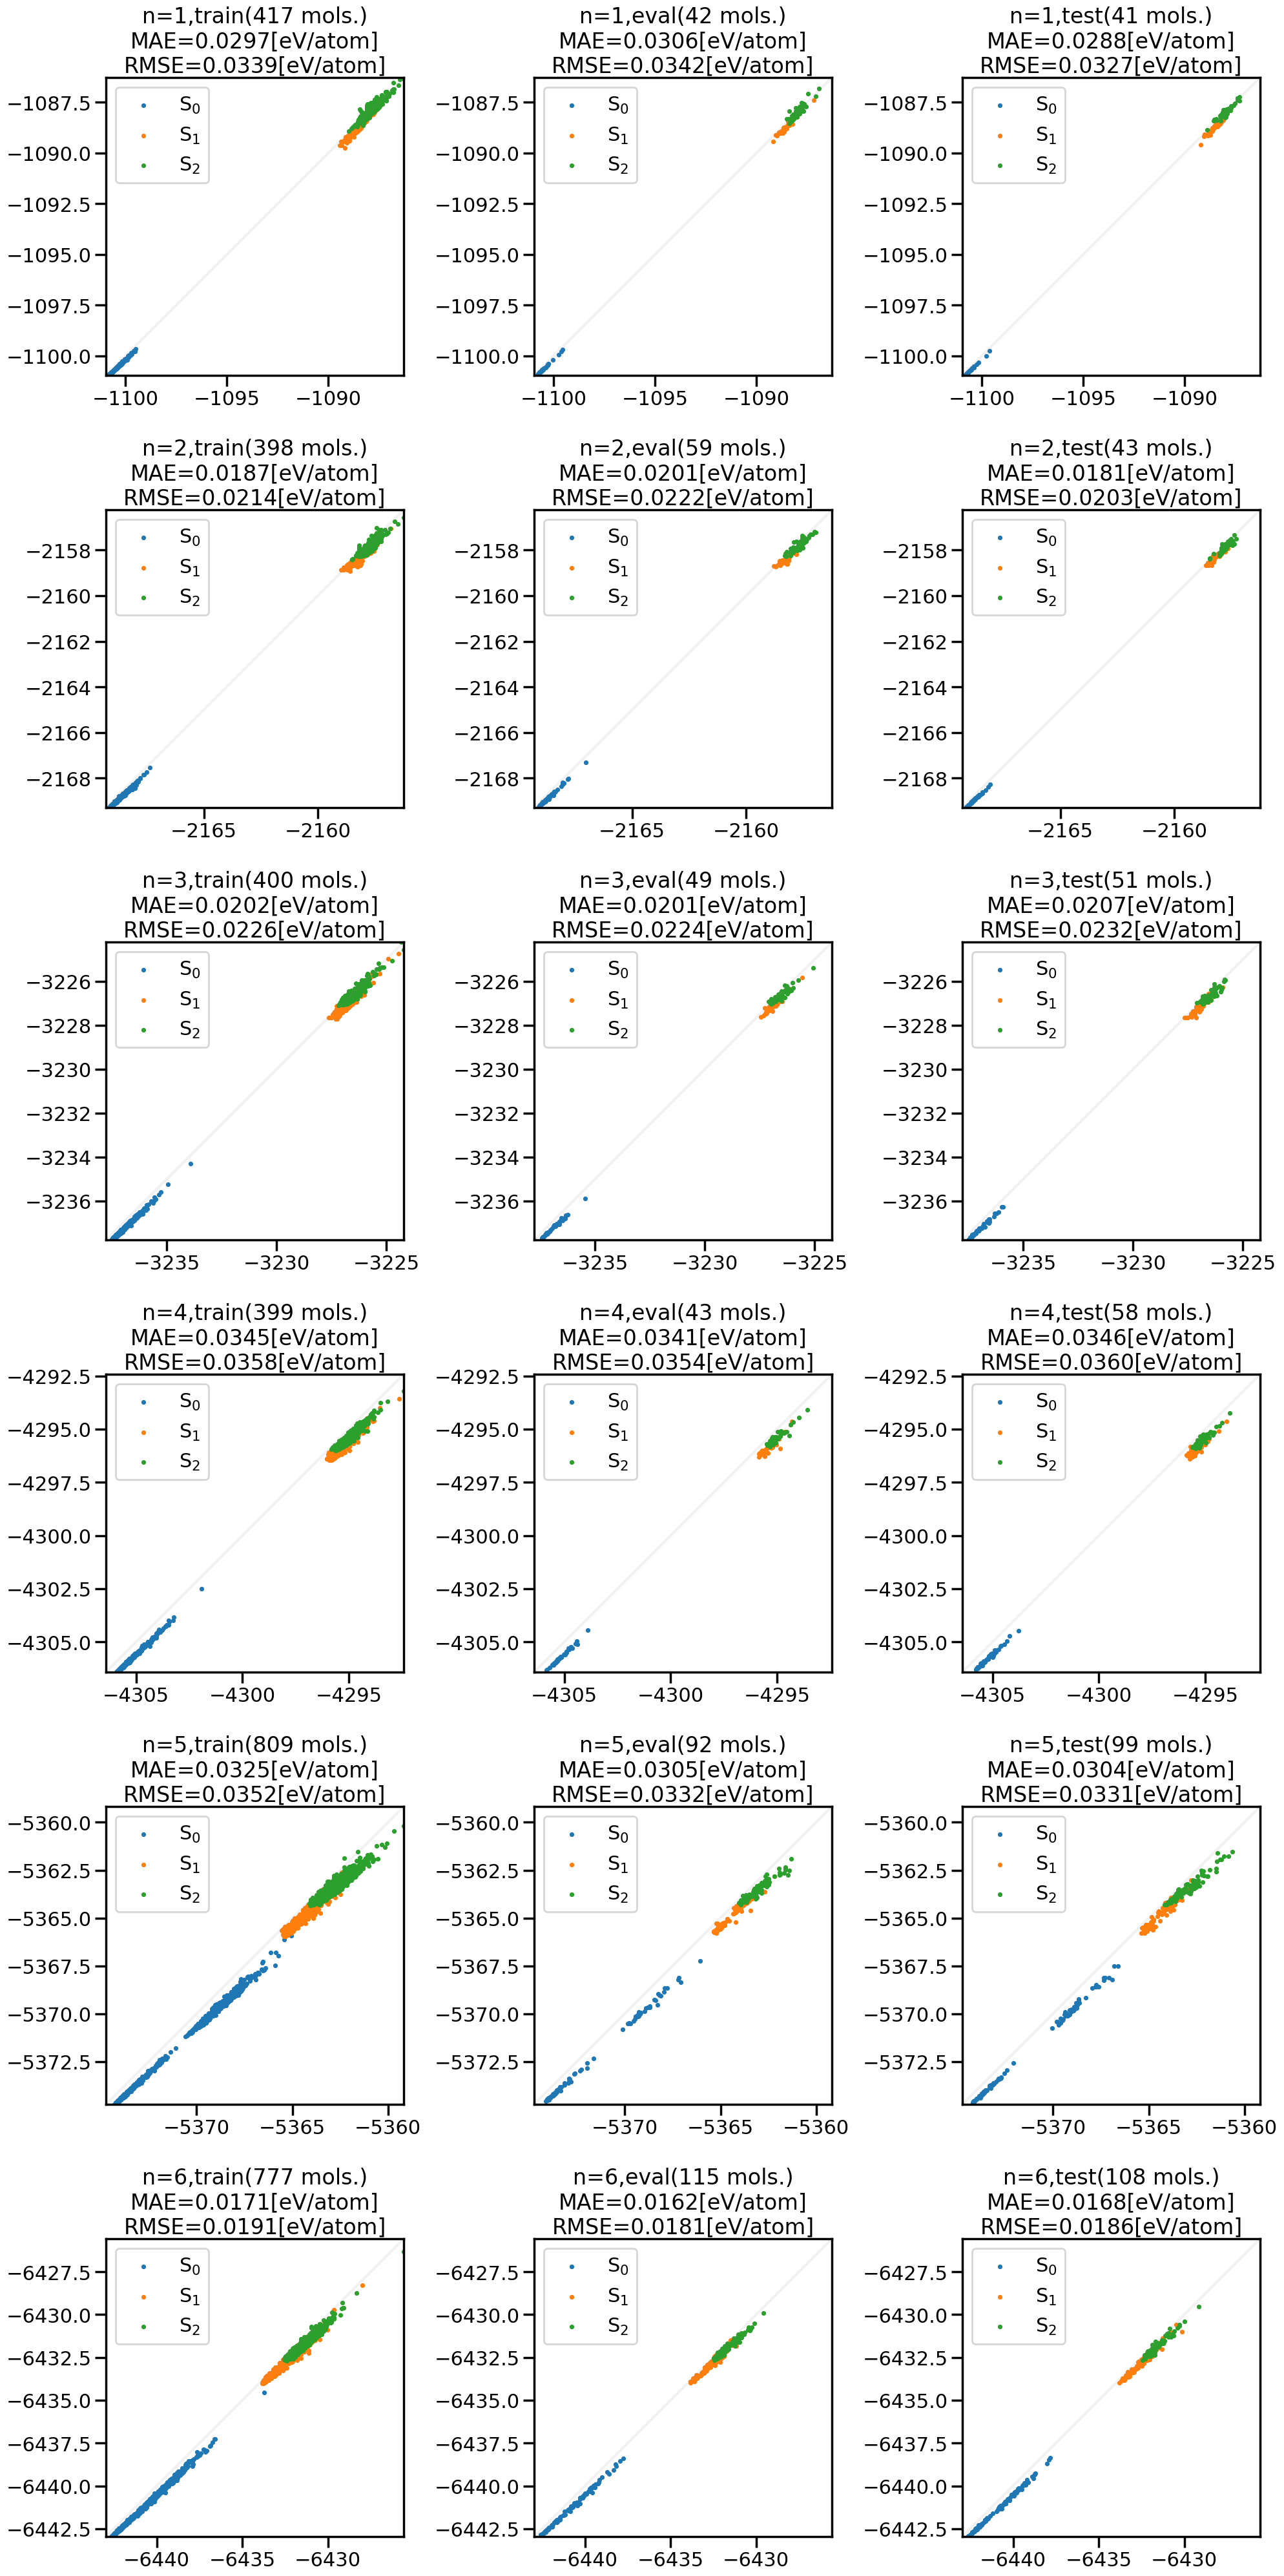

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

import seaborn as sns

sns.set_context("poster")
plt.rcParams["grid.linewidth"] = 0.8

ncol = 3
nrow = 6
fig, axes = plt.subplots(figsize=(6.75 * ncol, 6.75 * nrow), ncols=ncol, nrows=nrow)
methods = ["train", "val", "test"]
titles = ["train", "eval", "test"]

all_energies_qme = np.load(f"evaluate_answer.npz")
all_energies_e = np.load(f"evaluate_prediction.npz")
au2eV = 27.2114079527

# Plot energies train
nstate = 3
num_mol = 6
lim_min_list = [float("inf") for _ in range(num_mol)]
lim_max_list = [-float("inf") for _ in range(num_mol)]
atomref = [-0.6054911169972964 * au2eV, -38.03184673889332 * au2eV]
for i, method in enumerate(methods):
    energies_qme = all_energies_qme[method]
    energies_e = all_energies_e[method]
    energies_qme *= au2eV
    energies_e *= au2eV

    category = [[] for _ in range(num_mol)]
    for j, e in enumerate(energies_qme):
        c = int((-e[0]) // 1000)
        category[c - 1].append(j)
    for j, c in enumerate(category):
        ax = axes[j, i]
        tmp_qme = []
        tmp_e = []
        for state in range(nstate):
            atomref_e = atomref[0] * (2 * (j + 1) + 2) + atomref[1] * (j + 1)
            # energies_qme[c]-=atomref_e
            # energies_e[c]-=atomref_e
            ax.scatter(
                energies_qme[c, state],
                energies_e[c, state],
                label="S$_%i$" % state,
                s=10,
            )
            tmp_qme.extend(energies_qme[c, state])
            tmp_e.extend(energies_e[c, state])

        num_C = j + 1
        num_atom = num_C * 3 + 2
        energy_mae = mean_absolute_error(tmp_e, tmp_qme) / (num_atom)
        energy_rmse = mean_squared_error(tmp_e, tmp_qme, squared=False) / (num_atom)
        ax.set_title(
            f"n={j+1},{titles[i]}({len(energies_e[c])} mols.)\nMAE={energy_mae:.4f}[eV/atom]\nRMSE={energy_rmse:.4f}[eV/atom]"
        )
        lim_max_list[j] = max([lim_max_list[j], max(tmp_e), max(tmp_qme)])
        lim_min_list[j] = min([lim_min_list[j], min(tmp_e), min(tmp_qme)])
        ax.legend()
for i, method in enumerate(methods):
    for j in range(num_mol):
        ax = axes[j, i]
        ax.set_xlim(lim_min_list[j], lim_max_list[j])
        ax.set_ylim(lim_min_list[j], lim_max_list[j])
        x = np.linspace(lim_min_list[j], lim_max_list[j], 1000)
        ax.plot(x, x, linestyle="solid", color="gray", alpha=0.1)
        ax.set_aspect("equal")
plt.tight_layout()
plt.show()

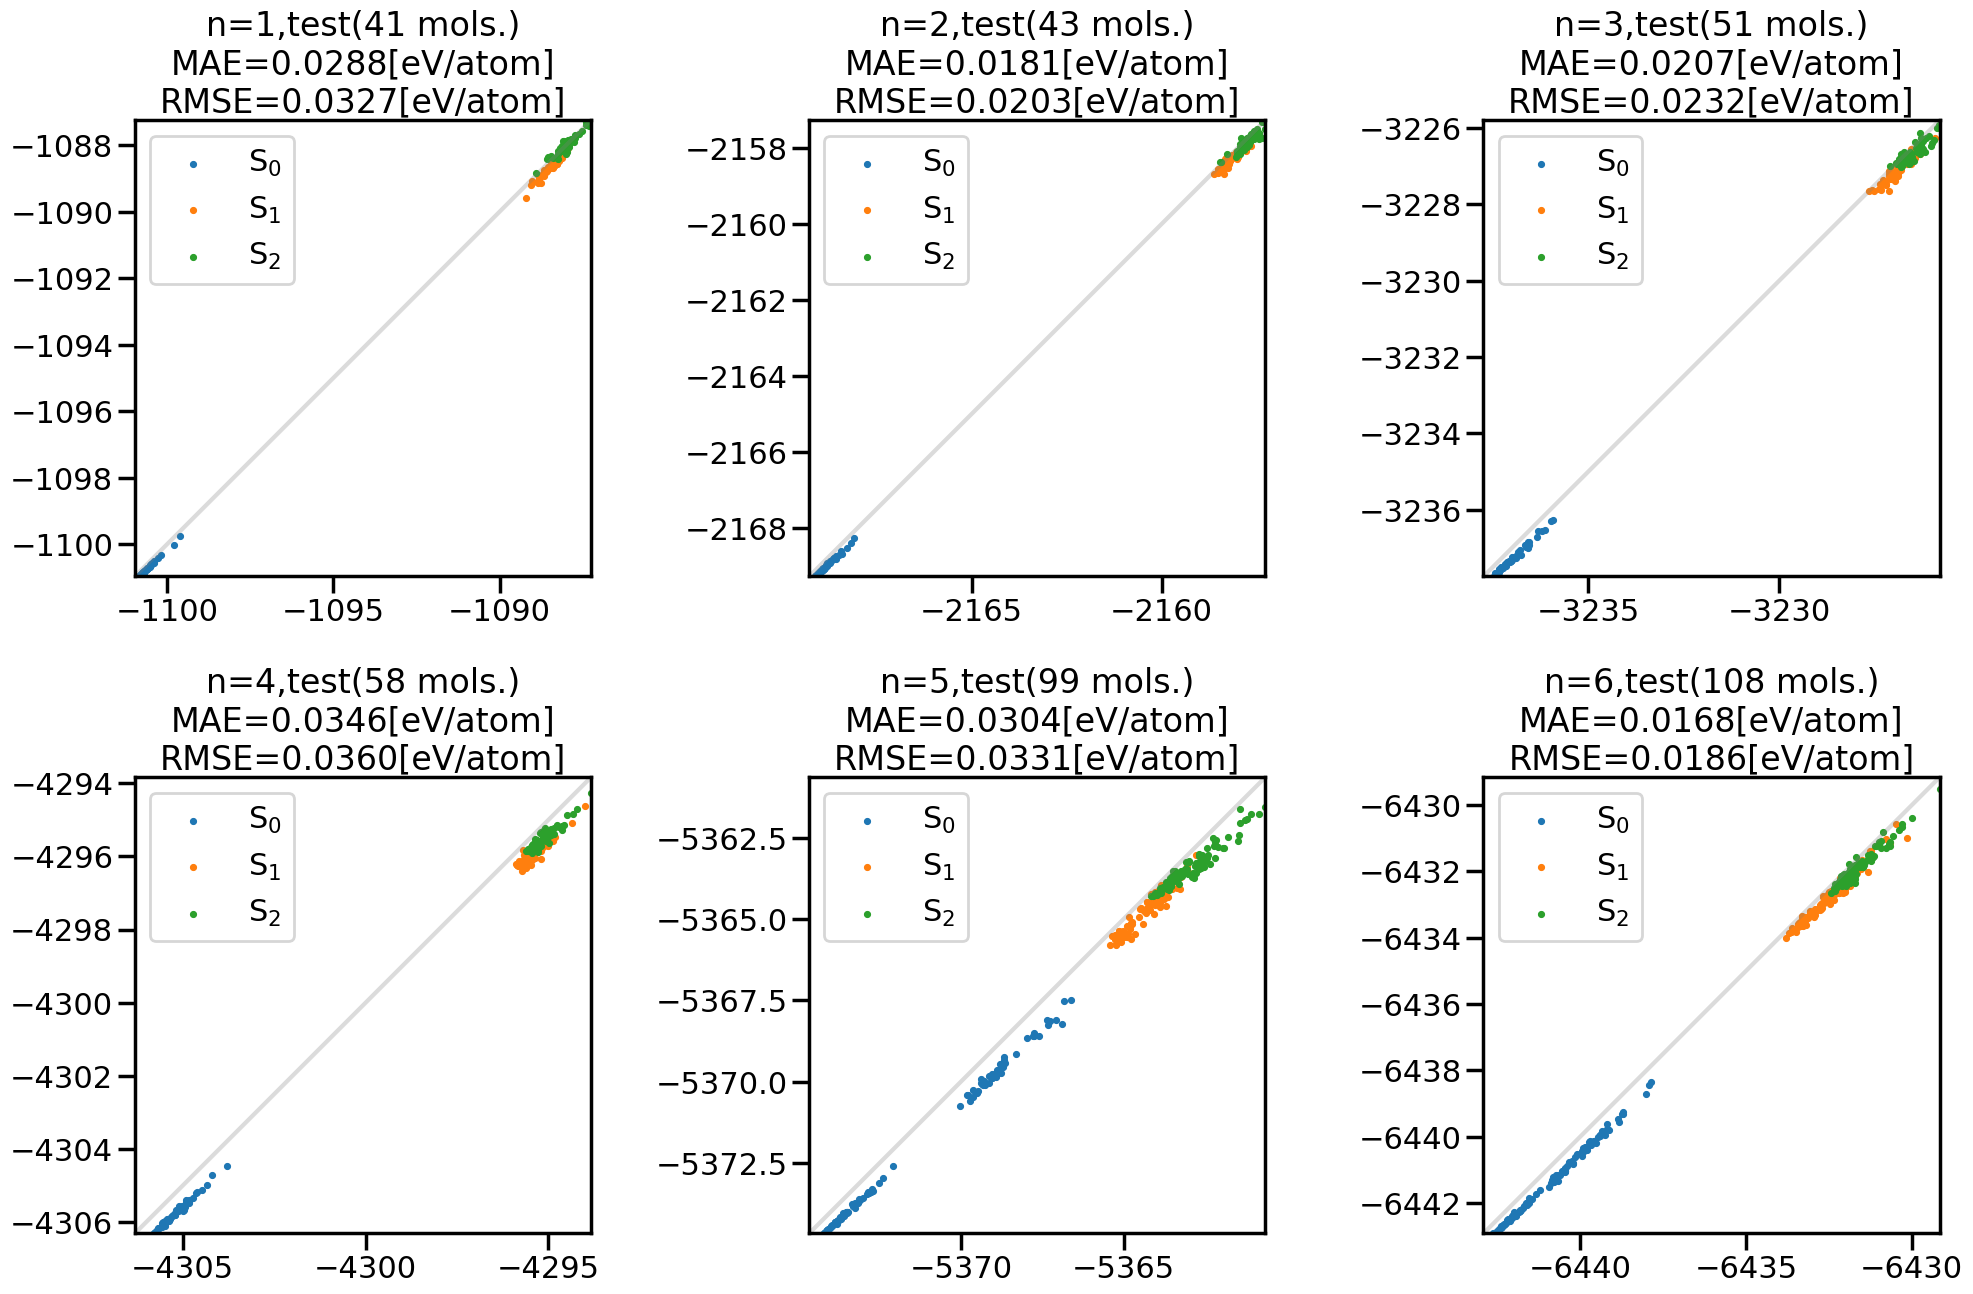

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

import seaborn as sns

sns.set_context("poster")
plt.rcParams["grid.linewidth"] = 0.8

ncol = 3
nrow = 2
fig, axes = plt.subplots(figsize=(6.75 * ncol, 6.75 * nrow), ncols=ncol, nrows=nrow)
methods = ["train", "val", "test"]
titles = ["train", "eval", "test"]

all_energies_qme = np.load(f"evaluate_answer.npz")
all_energies_e = np.load(f"evaluate_prediction.npz")

au2eV = 27.2114079527

# Plot energies train
nstate = 3
num_mol = 6

lim_min_list = [float("inf") for _ in range(num_mol)]
lim_max_list = [-float("inf") for _ in range(num_mol)]
atomref = [-0.6054911169972964 * au2eV, -38.03184673889332 * au2eV]
for i, method in enumerate(methods):
    if method != "test":
        continue
    energies_qme = all_energies_qme[method]
    energies_e = all_energies_e[method]
    energies_qme *= au2eV
    energies_e *= au2eV

    category = [[] for _ in range(num_mol)]
    for j, e in enumerate(energies_qme):
        c = int((-e[0]) // 1000)
        category[c - 1].append(j)
    for j, c in enumerate(category):
        i0, i1 = j // 3, j % 3
        ax = axes[i0, i1]
        tmp_qme = []
        tmp_e = []
        for state in range(nstate):
            atomref_e = atomref[0] * (2 * (j + 1) + 2) + atomref[1] * (j + 1)
            # energies_qme[c]-=atomref_e
            # energies_e[c]-=atomref_e
            ax.scatter(
                energies_qme[c, state],
                energies_e[c, state],
                label="S$_%i$" % state,
                s=10,
            )
            tmp_qme.extend(energies_qme[c, state])
            tmp_e.extend(energies_e[c, state])

        num_C = j + 1
        num_atom = num_C * 3 + 2
        energy_mae = mean_absolute_error(tmp_e, tmp_qme) / (num_atom)
        energy_rmse = mean_squared_error(tmp_e, tmp_qme, squared=False) / (num_atom)
        ax.set_title(
            f"n={j+1},{titles[i]}({len(energies_e[c])} mols.)\nMAE={energy_mae:.4f}[eV/atom]\nRMSE={energy_rmse:.4f}[eV/atom]"
        )
        lim_max_list[j] = max([lim_max_list[j], max(tmp_e), max(tmp_qme)])
        lim_min_list[j] = min([lim_min_list[j], min(tmp_e), min(tmp_qme)])

        ax.legend()
for i, method in enumerate(methods):
    for j in range(num_mol):
        i0, i1 = j // 3, j % 3
        ax = axes[i0, i1]
        ax.set_xlim(lim_min_list[j], lim_max_list[j])
        ax.set_ylim(lim_min_list[j], lim_max_list[j])
        x = np.linspace(lim_min_list[j], lim_max_list[j], 1000)
        ax.plot(x, x, linestyle="solid", color="gray", alpha=0.1)
        ax.set_aspect("equal")
plt.tight_layout()
plt.show()

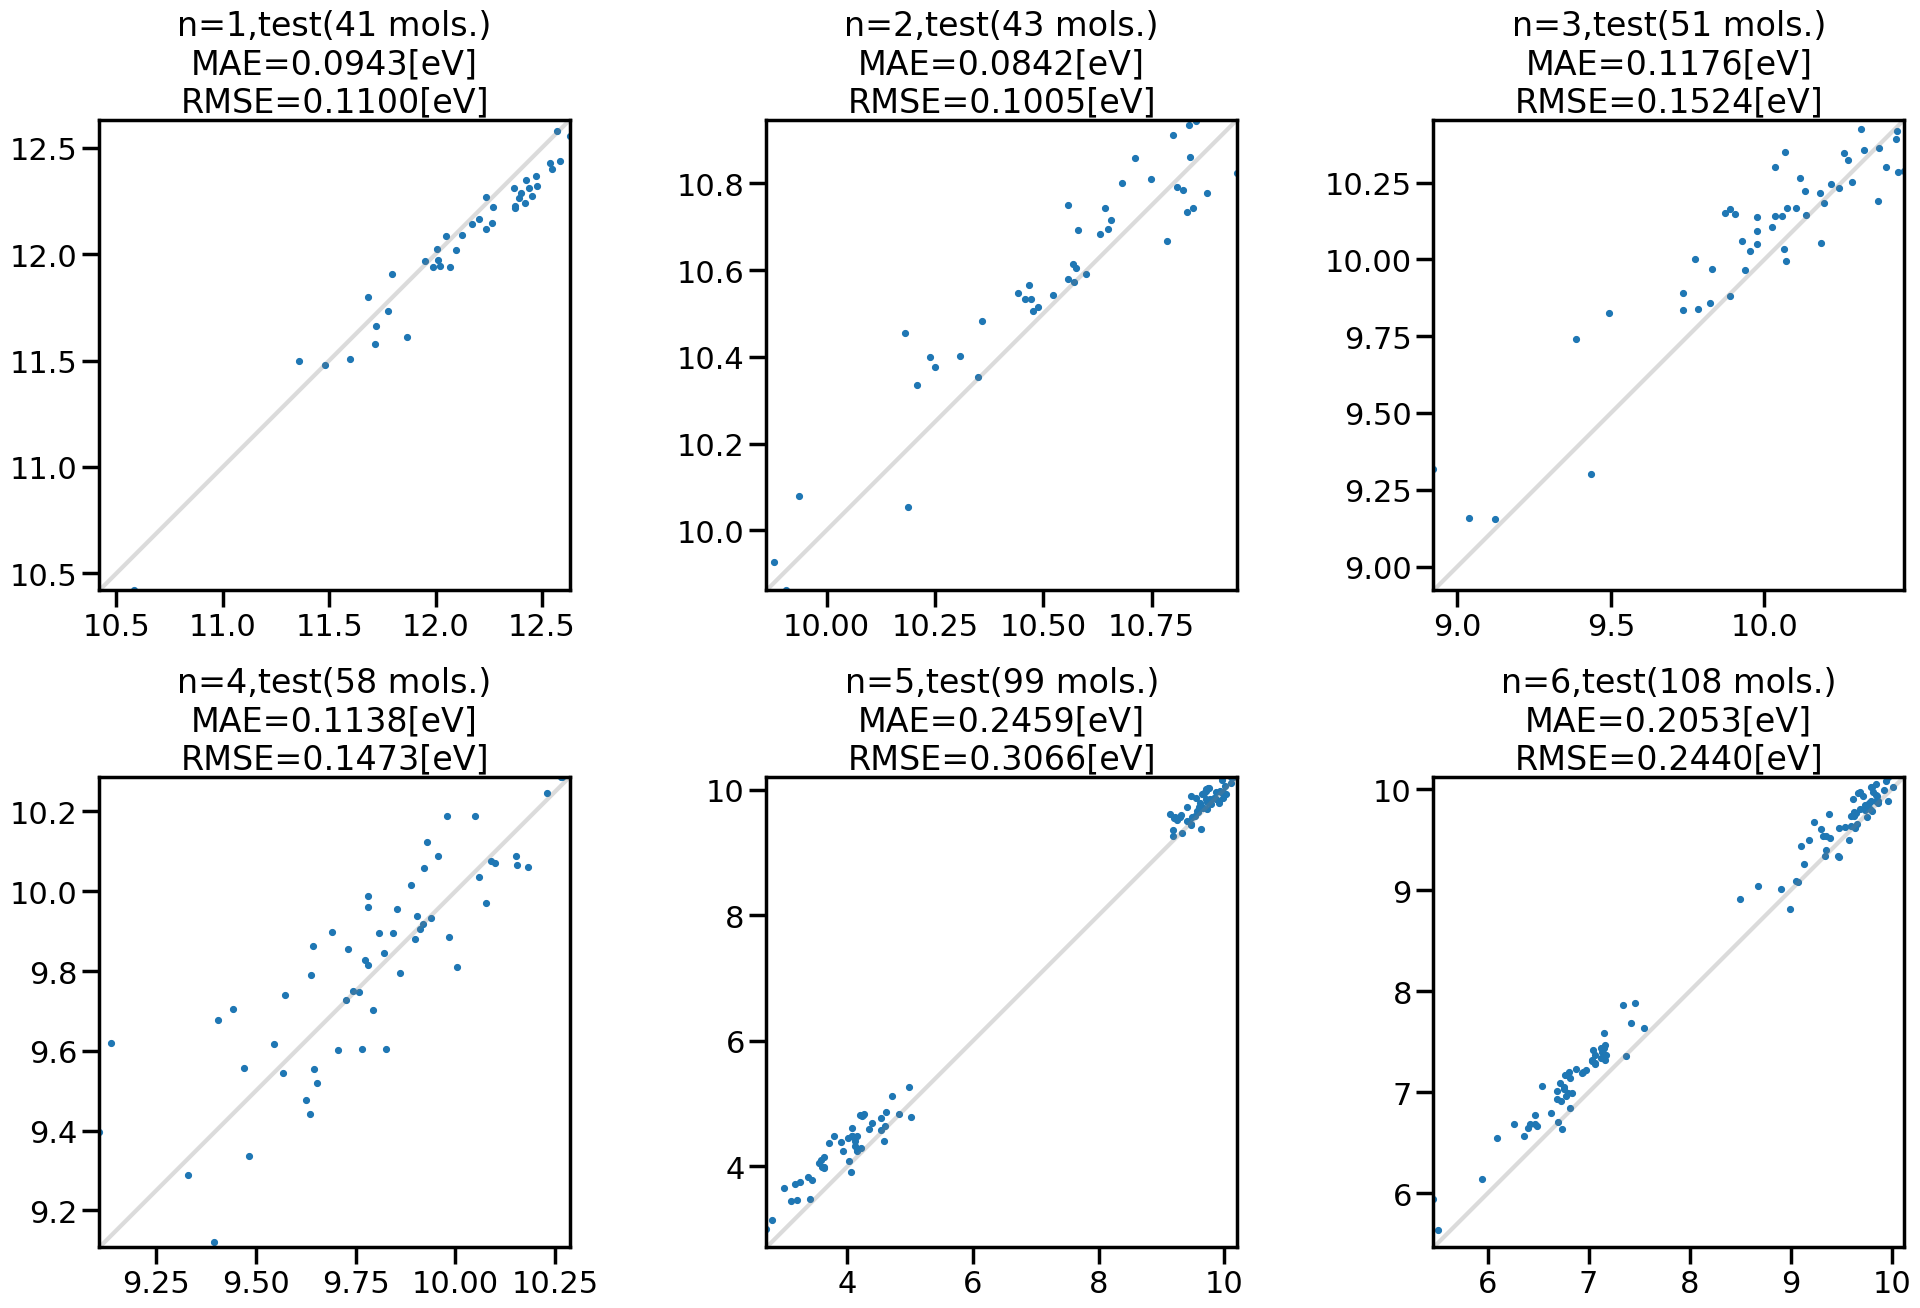

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

import seaborn as sns

sns.set_context("poster")
plt.rcParams["grid.linewidth"] = 0.8

ncol = 3
nrow = 2
fig, axes = plt.subplots(figsize=(6.75 * ncol, 6.75 * nrow), ncols=ncol, nrows=nrow)
methods = ["train", "val", "test"]
titles = ["train", "eval", "test"]

all_energies_qme = np.load(f"evaluate_answer.npz")
all_energies_e = np.load(f"evaluate_prediction.npz")

au2eV = 27.2114079527


# Plot energies train
nstate = 3
num_mol = 6
# num_atom = 20
lim_min_list = [float("inf") for _ in range(num_mol)]
lim_max_list = [-float("inf") for _ in range(num_mol)]

for i, method in enumerate(methods):
    if method != "test":
        continue
    energies_qme = all_energies_qme[method]
    energies_e = all_energies_e[method]
    energies_qme *= au2eV
    energies_e *= au2eV

    category = [[] for _ in range(num_mol)]
    for j, e in enumerate(energies_qme):
        c = int((-e[0]) // 1000)
        category[c - 1].append(j)
    for j, c in enumerate(category):
        ax = axes[j // 3, j % 3]
        tmp_qme = []
        tmp_e = []
        state = 1
        ax.scatter(
            energies_qme[c, state] - energies_qme[c, 0],
            energies_e[c, state] - energies_e[c, 0],
            s=10,
        )
        tmp_qme.extend(energies_qme[c, state] - energies_qme[c, 0])
        tmp_e.extend(energies_e[c, state] - energies_e[c, 0])
        num_C = j + 1
        num_atom = num_C * 3 + 2
        energy_mae = mean_absolute_error(tmp_e, tmp_qme)
        energy_rmse = mean_squared_error(tmp_e, tmp_qme, squared=False)
        ax.set_title(
            f"n={j+1},{titles[i]}({len(energies_e[c])} mols.)\nMAE={energy_mae:.4f}[eV]\nRMSE={energy_rmse:.4f}[eV]"
        )
        lim_max_list[j] = max([lim_max_list[j], max(tmp_e), max(tmp_qme)])
        lim_min_list[j] = min([lim_min_list[j], min(tmp_e), min(tmp_qme)])

for i, method in enumerate(methods):
    for j in range(num_mol):
        ax = axes[j // 3, j % 3]
        ax.set_xlim(lim_min_list[j], lim_max_list[j])
        ax.set_ylim(lim_min_list[j], lim_max_list[j])
        x = np.linspace(lim_min_list[j], lim_max_list[j], 1000)
        ax.plot(x, x, linestyle="solid", color="gray", alpha=0.1)
        ax.set_aspect("equal")

plt.tight_layout()
plt.show()